In [ ]:
%matplotlib inline

## Array computing

- Will focus on `numpy`
- Simple motivation
   - Short
   - Powerful syntax
   - Also efficient
- More later


## Numpy arrays

- Fixed **size**
- Contiguous block of memory
- Fixed datatype (typically), **dtype**
- Can change the **shape**
- Structured arrays: packed structs
- Arbitrary number of dimensions
- Indexing, slicing and striding
- Memory efficient: views vs copies
- Assume familiarity: https://numpy.org/doc/stable/user/quickstart.html


## Some simple examples


In [ ]:
import numpy as np

In [ ]:
x = [1, 2, ]
x[:3]

In [ ]:
x = np.arange(10)
print(x.size, x.itemsize)
print('shape:', x.shape)
print('dtype:', x.dtype)
print(x.nbytes)

In [ ]:
x

In [ ]:
x[1:3]

In [ ]:
x[1:-3]

In [ ]:
x[:-3]

In [ ]:
x[1:-3:2]

## Multi-dimensional arrays

- Many array creation functions
- `array, zeros, zeros_like, ones, ones_like, empty`,
- `empty_like, arange, linspace, fromfunction, fromfile`


In [ ]:
x = np.identity(5)
x

In [ ]:
np.zeros((2, 2, 2))

In [ ]:
x, x.dtype

In [ ]:
x = np.arange(9)
x.strides

In [ ]:
x = np.arange(9)
x.shape = 3, 3
x

In [ ]:
x.strides

In [ ]:
x[0, 1]

In [ ]:
x[0][1]

In [ ]:
# Elementwise operations
2*x

In [ ]:
np.sin(x)

## Simple Laplace equation in 2D

- Jacobi iterations
- Basic theory


## Simple implementation

- Using simple looping


In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
T = np.zeros((10, 10))
T[0] = 100
T[:,-1] = 100

In [5]:
def loop(T):
    N = T.shape[0]
    Tn = np.empty_like(T)
    for i in range(1, N-1):
        for j in range(1, N-1):
            Tn[i, j] = (T[i+1, j] + T[i-1,j] + T[i, j+1] + T[i, j-1])*0.25
            
    T[1:-1, 1:-1] = Tn[1:-1, 1:-1]

[[100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.        ]
 [  0.          50.          69.8327613   79.33104519  84.82388714
   88.62541924  91.70657862  94.51629321  97.25814661 100.        ]
 [  0.          30.1672387   50.          62.66753233  71.33908413
   77.97121119  83.68460203  89.10044762  94.51629321 100.        ]
 [  0.          20.66895481  37.33246767  50.          59.89370587
   68.23573936  75.9601707   83.68460203  91.70657862 100.        ]
 [  0.          15.17611286  28.66091587  40.10629413  50.
   59.11786968  68.23573936  77.97121119  88.62541924 100.        ]
 [  0.          11.37458076  22.02878881  31.76426064  40.88213032
   50.          59.89370587  71.33908413  84.82388714 100.        ]
 [  0.           8.29342138  16.31539797  24.0398293   31.76426064
   40.10629413  50.          62.66753233  79.33104519 100.        ]
 [  0.           5.48370679  10.89955238  16.31539797  22.02878881
   2

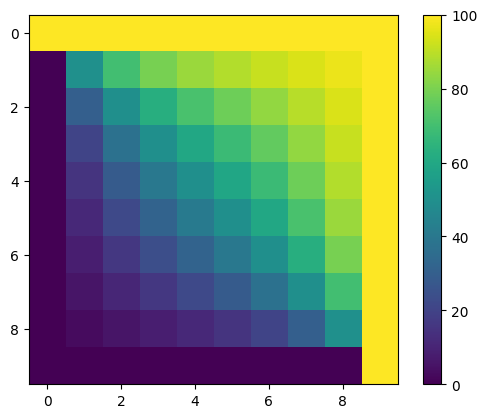

In [6]:
for i in range(1000): loop(T)
print(T)
plt.imshow(T); plt.colorbar();

## Using numpy arrays

- Implementation
- How it works


In [ ]:
def array_loop(T):
    T[1:-1, 1:-1] = (T[2:, 1:-1] + T[:-2,1:-1] + T[1:-1,2:] + T[1:-1, :-2])*0.25

In [ ]:
T = np.zeros((10, 10))
T[0] = 100
T[:,-1] = 100

In [ ]:
for i in range(100): array_loop(T)
plt.imshow(T); plt.colorbar();

## Timing

- Simplistic timing for now
- Use the `time` module
- Or we can use `%timeit` or `%time`


In [ ]:
n = 50
T = np.zeros((n, n))

In [ ]:
M = 20
import time
s = time.perf_counter()
for i in range(M):
    array_loop(T)
print(time.perf_counter() - s)

In [ ]:
import timeit

In [ ]:
%timeit np.empty_like(T)

In [ ]:
%timeit T.copy()

In [ ]:
timeit

In [ ]:
%timeit loop(T)

## How does this work?

- Advantages and pitfalls
- Why use arrays?
